<a href="https://colab.research.google.com/github/jilliangreene/sta_554_assignments/blob/main/Greene_STA554_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 554 HW 5
Jillian Greene

# Part 1


We discussed the “Five V’s of Big Data”. Give an example of a place where you’ve encountered big
data or a topic you are interested in where big data would arise. Specifically address the five V’s for
the example and whether/how they apply to your example. (5 pts)


*   I am interested in satellite remote sensing which stores complex data as raster images (geotifs). These data are often 3-dimensional with each image having an x and y (lat/long) and multiple layers for the spectral reflectance. This data becomes big very fast as a project covers a spatial area and often has many variables.
*   The obvious V's for this example are **volume** and **velocity**. Single images can be several GBs and in many cases the images are coming in every day! There can also be **variety** in the data type with some being geotifs and some being netCDFs. Other considerations, such as geographic artifacts, cloud interactions, or sun glint, lead to **veracity** in the data values. The data is very **valuable** as it allows for widespread analysis of various earth science topics.



Read about the database we’ll use below (part IV). Give an example for each letter in the CRUD acronym
in the context of this database. (3 pts)

*   **Create**: Create new rows in the `HallOfFame` table when  new players are inducted.
*   **Read**: Retrieve table of all the teams that played in 2018 from the SQL database.
*   **Update**: Update rows when a team wins or loses new games.
*   **Delete**: Delete rows of the teams you're uninterested in.

What is the purpose of the HAVING clause when writing SQL code? (Recall the sqlitetutorial.net tutorial
on the SELECT statement.) (3 pts)

*   The `HAVING` clause can execute aggregate functions on groups that have been selected using `GROUP BY`. e.g. To find the teams that have more than X number of home runs (where home runs may be designated by player in the table rather than teams; this is just an example, I don't know sports stats well enough to say if that's how it usually is!).

# Part 2

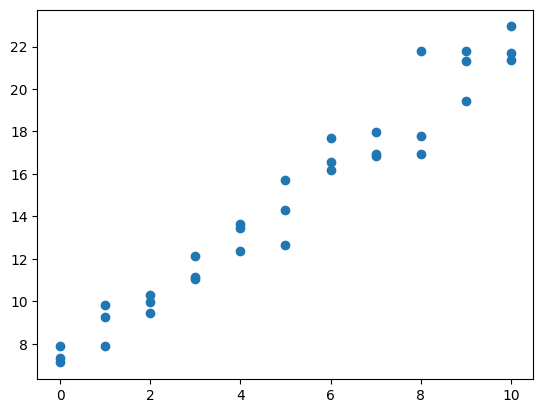

In [2]:
# --- Provided code ---
#import some modules needed
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng(32)
beta_0 = 7
beta_1 = 1.5
# get three 'values' of x at each integer from 0 to 10.
x = np.array(list(np.linspace(start = 0, stop = 10, num = 11))*3)
n = 33
#create the 'responses' modeled from the line plus a random deviation
y = beta_0 + beta_1*x + rng.standard_normal(n)
#visualize the data
plt.scatter(x = x, y = y)
plt.show()

In [5]:
# Use sklearn to estimate slope
import sklearn.linear_model as lm
reg = lm.LinearRegression()
reg.fit(x.reshape(-1,1), y)
print("Slope:", reg.coef_)

Slope: [1.47450564]


In [ ]:
# Repeat 5000 times
slopes = []
for i in range(5000):
  # print("Iteration: ", i)
  # Regenerate Ys
  y = beta_0 + beta_1*x + rng.standard_normal(n)

  # Calculate slope
  reg = lm.LinearRegression()
  reg.fit(x.reshape(-1,1), y)

  # Add slope to slopes list
  slopes.append(reg.coef_[0])

  # Print length of slopes as check
  # print("Length of slopes: ", len(slopes))


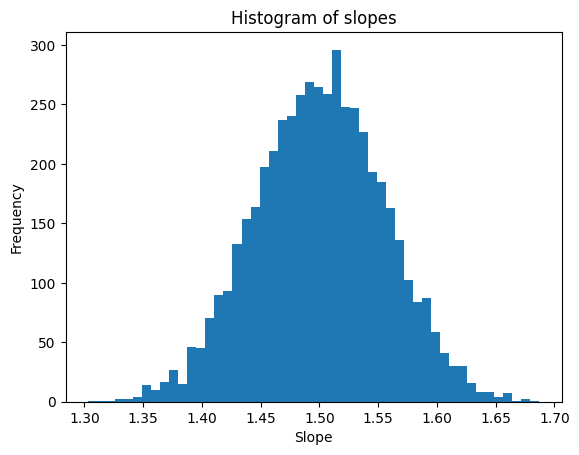

In [18]:
# Histogram of slopes
plt.hist(slopes, bins = 50)
plt.title("Histogram of slopes")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.show()

In [20]:
#  Probability of observing a sample slope larger than 1.65
# p of simulated values > 1.65
print(np.mean(np.array(slopes) > 1.65))

0.0028


This value means users have a 0.28% chance of the slope calculated being > 1.65, i.e. highly unlikely. This is important for hypothesis testing because it would help to determine whether or not to reject the null hypothesis. In this case, if the hypothesis was that slopes would be > 1.65, this probability output would support rejecting the null hypothesis.

# Part 3

**Q5**

Pick an example in the article and briefly outline the issue around the data used to fit the model.
(3 pts)

*   There are a couple of instances in the article where ML models have a bias surrounding women. The first being the mention of a model associated women with images of kitchens, while another model developed to analyze resumes penalizes the mention of "women." This happens due to the social bias that the model is trained on. When training data contains bias, the model will follow the same.

Describe how we might augment the data or otherwise account for the bias in that situation. (3 pts)

*   To account for these biases, training data should be computed in a way to remove bias. It could be setting the success metrics to something more quantitative than qualitative or having training data curated from a larger teams opinion rather than a few individuals. By including more people (hopefully diverse...) in the process would help to remove any implicit biases.

**Q6**

Choose one of the three major areas the paper discusses. Summarize the use of big data there.
Are there any biases or other missing data that might affect results? (I know this is likely difficult
as most of us aren’t experts in Earth science - just do your best - my goal is to try to get us to
always ask questions about the data collected and used for a study!) (5 pts)

*   In global atmoshperic modeling, large-scale data products are used to model historical and then future atmospheric contents. A lack of ground-truthing data from data-poor regions could lead to a bias that would affect the results. In poor communities where data availability tends to be less and atmospheric pollutants tend to be worse, there could be a bias in global models where these data are excluded.

**Q7**

To have something to put here, can you think of
another variable or scenario where understanding rare events is important? (3 pts)

*   Historically rare weather events are becoming more and more prevelant, so events like 100 year floods are happening more frequently. Understanding these events is important for both citizens, city planners, and federal flood insurance policymakers. Ensuring people get both the warning and care they need during these events is exceedingly important.

## Part 4

In [2]:
import pandas as pd
import sqlite3

con = sqlite3.connect('lahman_1871-2022.sqlite')

# Look at all tables in database using pd.read_sql()
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)
print(tables)


                   name
0           AllstarFull
1           Appearances
2        AwardsManagers
3         AwardsPlayers
4   AwardsShareManagers
5    AwardsSharePlayers
6               Batting
7           BattingPost
8        CollegePlaying
9              Fielding
10           FieldingOF
11      FieldingOFsplit
12         FieldingPost
13           HallOfFame
14            HomeGames
15             Managers
16         ManagersHalf
17                Parks
18               People
19             Pitching
20         PitchingPost
21             Salaries
22              Schools
23           SeriesPost
24                Teams
25      TeamsFranchises
26            TeamsHalf


In [8]:
# Query for all teams that played in 2015 from Teams table
query = "SELECT * FROM Teams WHERE yearID = 2015;"
teams_2015 = pd.read_sql(query, con)
teams_2015.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2015,AL,BAL,BAL,E,3,162,78,81,81,...,134,0.987,Baltimore Orioles,Oriole Park at Camden Yards,2281202,103,104,BAL,BAL,BAL
1,2015,AL,BOS,BOS,E,5,162,81,78,84,...,148,0.984,Boston Red Sox,Fenway Park II,2880694,104,107,BOS,BOS,BOS
2,2015,AL,CHA,CHW,C,4,162,81,76,86,...,159,0.983,Chicago White Sox,U.S. Cellular Field,1755810,92,93,CHW,CHA,CHA
3,2015,AL,CLE,CLE,C,3,161,80,81,80,...,136,0.987,Cleveland Indians,Progressive Field,1388905,106,106,CLE,CLE,CLE
4,2015,AL,DET,DET,C,5,161,81,74,87,...,165,0.986,Detroit Tigers,Comerica Park,2726048,97,98,DET,DET,DET


In [10]:
# Query for all players in HallOfFame, year voted in, and category
query = "SELECT playerID, yearid, category FROM HallOfFame;"
hof = pd.read_sql(query, con)
hof.head()

,playerID,yearid,category
0,aaronha01,1982,Player
1,abbotji01,2005,Player
2,abreubo01,2020,Player
3,abreubo01,2021,Player
4,abreubo01,2022,Player


In [12]:
# Query for all UNIQUE managers of teamID PIT and information from Managers table
query = "SELECT DISTINCT playerID FROM Managers WHERE teamID = 'PIT';"
pit_managers = pd.read_sql(query, con)
pit_managers

,playerID
0,bezdehu99
1,bragabo01
2,buckeal99
3,burnsto01
4,burwebi01
5,bushdo01
6,callani01
7,clarkfr01
8,davissp01
9,donovpa01


In [19]:
# Query for all playerIDs that managed teams inducted in the hall of fame
query = "SELECT DISTINCT Managers.playerID FROM Managers INNER JOIN HallOfFame ON Managers.playerID = HallOfFame.playerID WHERE HallOfFame.inducted = 'Y';"
hof_managers = pd.read_sql(query, con)
hof_managers.head()
print("Number of managers: ", len(hof_managers))


Number of managers:  97


In [18]:
# Return every season managed by those managers
query = "SELECT Managers.playerID, Managers.G, Managers.W, Managers.L FROM Managers INNER JOIN HallOfFame ON Managers.playerID = HallOfFame.playerID WHERE HallOfFame.inducted = 'Y';"
hof_seasons = pd.read_sql(query, con)
hof_seasons.head()

,playerID,G,W,L
0,alstowa01,154,92,62
1,alstowa01,154,98,55
2,alstowa01,154,93,61
3,alstowa01,154,84,70
4,alstowa01,154,71,83


In [20]:
# Sum wins and losses for each playerID
hof_seasons = hof_seasons.groupby('playerID').sum()
hof_seasons.head()

,G,W,L
playerID,,,
alstowa01,3658,2040,1613
andersp01,4030,2194,1834
ansonca01,2288,1296,947
applilu01,40,10,30
baineha01,4,1,3


In [21]:
# New variable that is the Win-Loss percentage
hof_seasons['W/L'] = hof_seasons['W'] / (hof_seasons['W'] + hof_seasons['L'])

# Sort by W/L
hof_seasons = hof_seasons.sort_values(by = 'W/L', ascending = False)
hof_seasons.head()

,G,W,L,W/L
playerID,,,,
simmote01,1,1,0,1.000000
wrighge01,85,59,25,0.702381
spaldal01,126,78,47,0.624000
mccarjo99,3487,2125,1333,0.614517
comisch01,1410,840,541,0.608255
